# Titanic Part 2

Continuing where the <a href="https://ntoump.github.io/blog/machine%20learning/jupyter/tabular%20data/scikit-learn/titanic/2020/10/01/Titanic_PART_1.html">Part 1</a> left off, in this Part I will explore the most popular algorithm for Tabular data (i.e. _Random Forests),_ rapidly mention a few notes on hyperparameters, and pave the way for the more interesting Parts that are yet to come.

## First Submission
Before proceeding, it is fitting to firstly mention the practical results of the baseline model I presented in Part 1.

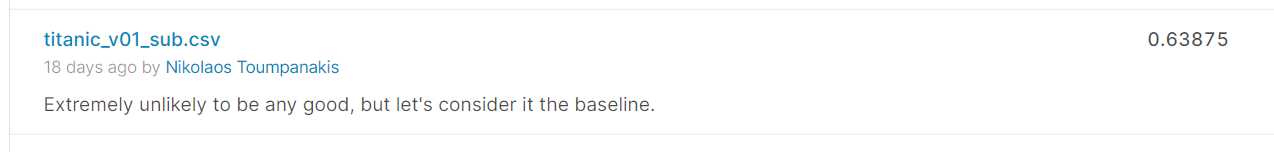

In [1]:
#hide_input
from IPython.display import Image

Image("titbase.PNG")

The results of a single Desicion Tree Regressor are not at all great. In fact, just by following the Kaggle recommended gender separation approach (which works based on the fact that most women survive while most men don't) one can achieve quite a better score than ~64%.

What if I tried next a series of Desicion Trees; namely a _Random Forest?_ Would that help improve the baseline?

## Random Forest Regressor
Having already experimented with the Decision Tree Regressor in the previous Part, it only makes sense to try next the _Random Forest Regressor_ algorithm.

Before moving on, however, I would like to demonstrate what happens when you are either misinformed regarding the inner workings of the algorithms you are applying or not cautious enough with the arguments you pass in it.

### The "perfect" model

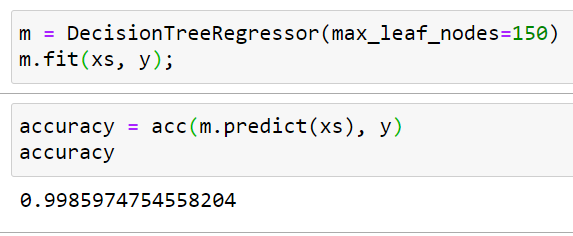

In [2]:
Image("perfacc.PNG")

You can see that I have created the perfect model with only three lines of code and minimal effort. 

Or have I? That accuracy seems to good to be true, and it is! I just wanted to see how much my model had learned _by heart,_ it turns out that's almost every entry in the dataset.

That is largely due to the very high number of _max leaf nodes,_ as well as the purposeful lack of other precautions. The model is almost perfectly fitted to the training dataset, which means that it will not generalize well in data that it has not been trained on. 

In fewer words, this is an almost perfectly overfitting (thereby _useless_ in real life) model.

### The not-so-perfect model(s)

After trying out many unimportant in this context hyperparameter options, I decided to facilitate the experimentation process by creating a template in which I pass in the every time desired options; I therefore created the function below.

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=int(len(xs)/2),
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

There are not many things happening in the function above; it merely passes its arguments to the <a href="https://scikit-learn.org/stable/">scikit-learn</a> provided Random Forest algorithm, alongside others that have been spelled out for clarity. 

Time to use the __rf__ function.

#### Model 1

In [ ]:
m = rf(xs, y)
accuracy = acc(m.predict(xs),y)
accuracy

0.8863955119214586

That means that the model __has__ absorbed a lot of the data, and is possibly overfitting by a few percentage points. Let's see what happens with the validation set.

In [ ]:
accuracy = acc(m.predict(valid_xs), valid_y)
accuracy

0.8258426966292135

The accuracy seems decent to say the least. It has already improved on the baseline model's score of ~82%, albeit not by a significant margin.

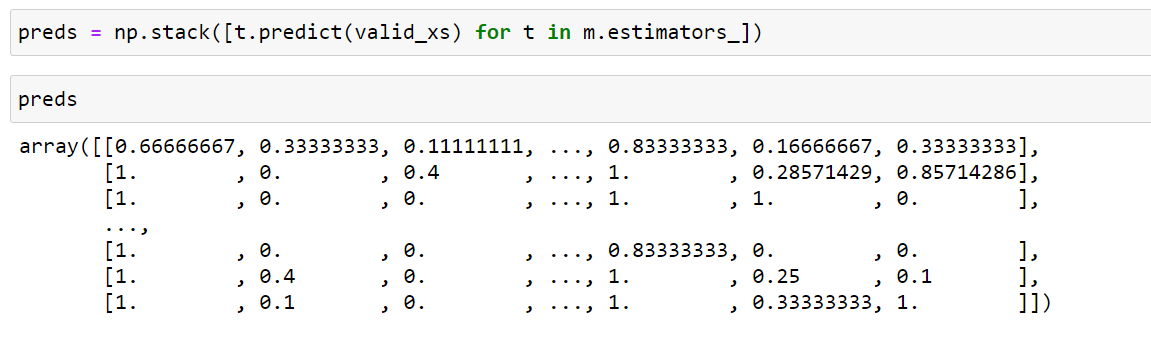

In [3]:
Image("estimatorspeak.PNG")

Using <a href="https://numpy.org/">numpy's</a> function _stack(),_ we can take an under-the-hood look at the predictions that each estimator (meaning __each seperate Decision Tree Regressor__) has made regarding _each_ entry of the validation dataset.

It is almost obvious that, generally speaking, there is uniformity (at least in how I deal with regression inference in this context; if r>=0.5 then r=1, else _(if r<0.5 then - __redundant)___ r=0).

#### Model 2

With slight tweaking we are already getting better results.

In [ ]:
m = rf(xs, y, 50, 450, 0.4)
acc(m.predict(xs), y)

0.884992987377279

In [ ]:
acc(m.predict(valid_xs), valid_y)

0.8314606741573034

Below we see the estimations regarding a range of 50 estimators; how would setting this hyperparameter as a specific number affect the accuracy compared to setting it as a different number.

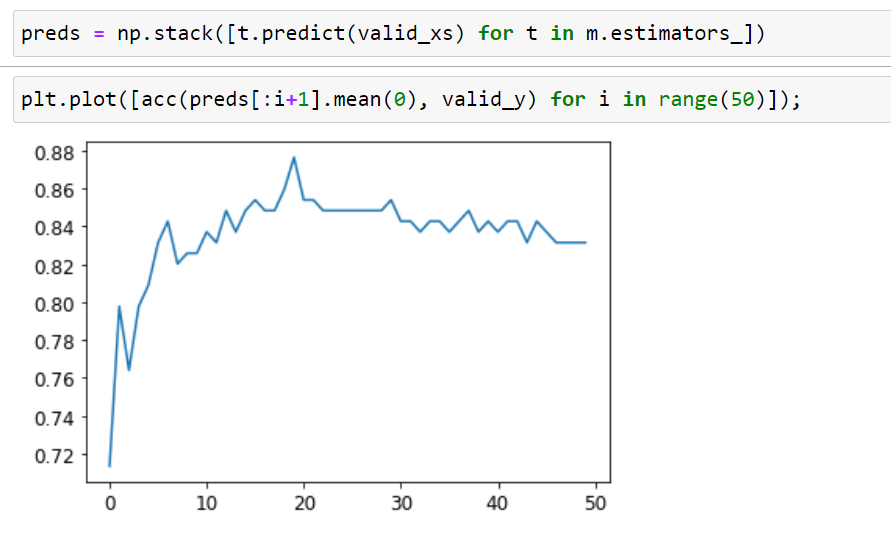

In [4]:
Image("predsplot.PNG")

#### Model 3
Let's tweak a bit more, just to see if any initial patterns could arise.

In [ ]:
m = rf(xs, y, 18, 400, 0.4)
acc(m.predict(xs), y)

0.8751753155680224

In [ ]:
acc(m.predict(valid_xs), valid_y)

0.8370786516853933

Not bad! It seems that with every model a gain of ~0.5% accuracy is noted.

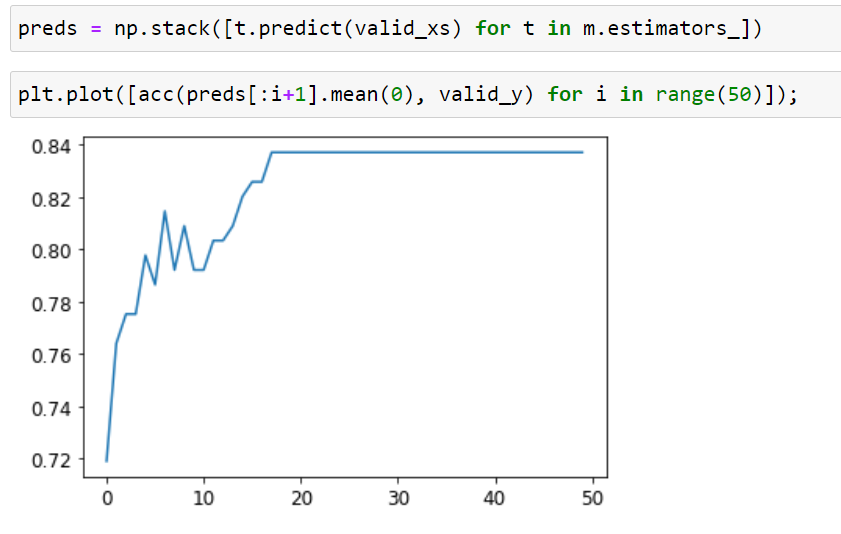

In [5]:
Image("predsplot0.PNG")

The graph shows that there is a limit to the effect that adding more _estimators_ can have on the accuracy of the model; from _20_ onwards there is not a noticeable improvement.

### Out-of-bag Error
While catching up with the theory of Random Forests, I could not help but notice the gravity that the _Out-of-bag Error_ seems to have on evaluating the model's performance more objectively. 

The main idea is described <a href="https://mlr.mlr-org.com/articles/tutorial/out_of_bag_predictions.html#:~:text=A%20prediction%20made%20for%20an,use%20the%20observation%20for%20training.">here</a> and <a href="https://en.wikipedia.org/wiki/Out-of-bag_error">here</a>, among other places.

To get the _OOB predictions_ in scikit-learn we use the __.oob_prediction___ attribute of the Random Forest Regressor.

In [ ]:
acc(m.oob_prediction_, y)

0.8120617110799438

The _OOB predictions_ are obviously different from the _"normal"_ predictions of the model. We see that this divergence extends to ~2.6% worth of accuracy. In other words, the worst score that I got after spending some time learning and experimenting is probably the most reliable indicator that instead of learning to generalize well, all this time my model has been learning to fit on the validation set instead.

And, naturally, this could not have happened without my aid.

In [ ]:
preds.shape

(18, 178)

The shape of the predictions is enlightening; we see the number of validation data _(178)_ alongside _18,_ which is the number of __estimators__ that the model has been created with. [You can verify that by checking up the first cell of __Model 3__, where the __estimators__ argument is the third positional argument in order.]

## Review

In this part I went over how a few instances (only the most notable of which I mention here to save space, time, and energy) of, probably, the most popular machine learning algorithm in Tabular data (i.e. _Random Forests)_ improve the overall accuracy and _reliability_ of a model. I briefly compared it to the model of the previous Part, and discussed the _OOB Error_ and its effects on this best-case (for now) model.

## Conclusion

Next up, we will explore a few other algorithms, start making regular submissions on Kaggle, and perhaps commence delving into _Neural Networks_ and their function in Tabular data.